In [1]:
# Objective is to link up the devon dataset with a PV system in the area
# start off with predicting PV based on image, not including time series aspect

# Potentially useful tutorial here https://medium.com/analytics-vidhya/fastai-image-regression-age-prediction-based-on-image-68294d34f2ed

### 1. Importing data

In [2]:
import numpy as np
import pandas as pd
import xarray as xr
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
SATELLITE_ZARR_PATH = "./data/devon-crop.zarr"

dataset = xr.open_dataset(
    SATELLITE_ZARR_PATH, 
    engine="zarr",
    chunks="auto",  # Load the data as a Dask array
)

print(dataset)

<xarray.Dataset>
Dimensions:  (time: 173624, y: 100, x: 100)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01T00:05:00 ... 2021-11-07T15:50:00
  * x        (x) float32 -8.221e+05 -8.231e+05 ... -9.201e+05 -9.211e+05
    x_osgb   (y, x) float32 dask.array<chunksize=(100, 100), meta=np.ndarray>
  * y        (y) float32 4.523e+06 4.524e+06 4.525e+06 ... 4.621e+06 4.622e+06
    y_osgb   (y, x) float32 dask.array<chunksize=(100, 100), meta=np.ndarray>
Data variables:
    data     (time, y, x) int16 dask.array<chunksize=(3946, 100, 100), meta=np.ndarray>


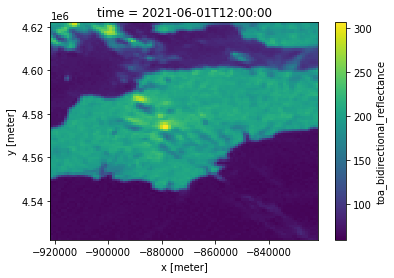

In [4]:
# images are as expected, great
dataset['data'].sel(time="2021-06-01 12:00").plot();

In [5]:
pv_power = xr.open_dataset("data/uk_pv/pv.netcdf", engine="h5netcdf")
pv_power

<xarray.Dataset>
Dimensions:   (datetime: 387254)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2018-01-01T06:05:00 ... 2021-10-27T23...
Data variables: (12/1311)
    10003     (datetime) float32 ...
    10004     (datetime) float32 ...
    10005     (datetime) float32 ...
    10048     (datetime) float32 ...
    10049     (datetime) float32 ...
    10063     (datetime) float32 ...
    ...        ...
    9870      (datetime) float32 ...
    9871      (datetime) float32 ...
    9902      (datetime) float32 ...
    9903      (datetime) float32 ...
    9960      (datetime) float32 ...
    9989      (datetime) float32 ...

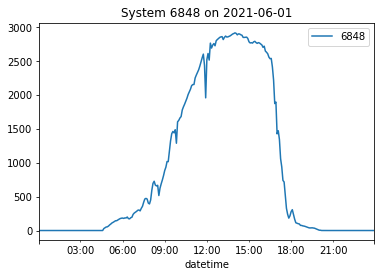

In [6]:
# One PV site - 20984, 21832, 6848 chosen, only 6848 had any readings

devon_pv_df = pv_power['6848'].to_dataframe()

# Goal is to get different images to match up with PV yield, maybe 4-8 over the course of a day

devon_pv_df = devon_pv_df[devon_pv_df.index < '2021-06-02']
devon_pv_df = devon_pv_df[devon_pv_df.index > '2021-06-01']

devon_pv_df.plot()
plt.title('System 6848 on 2021-06-01');


In [7]:
# X: dataset            # cropped satellite image
# Y: devon_pv_df        # pv_yield

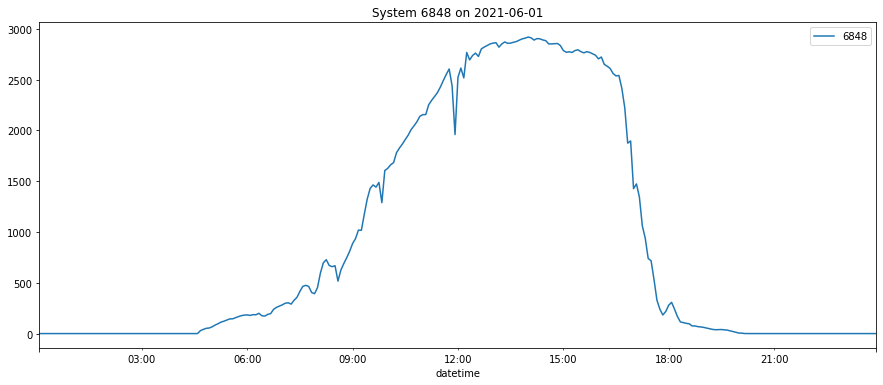

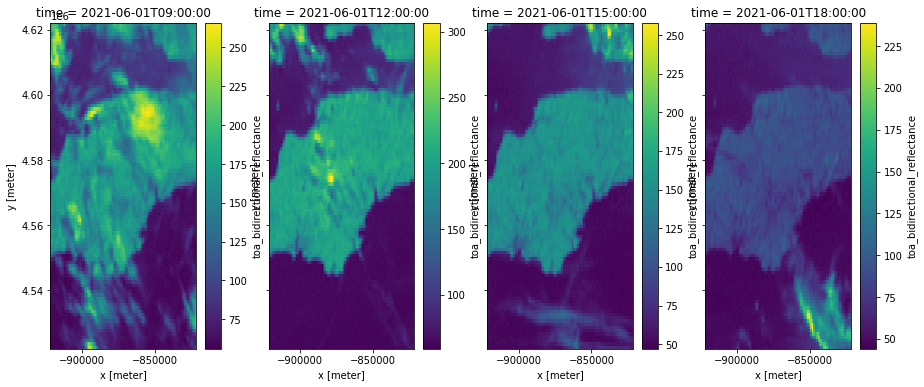

In [65]:
# Getting the images for one day

devon_pv_df = pv_power['6848'].to_dataframe()

# Goal is to get different images to match up with PV yield, maybe 4-8 over the course of a day

devon_pv_df = devon_pv_df[devon_pv_df.index < '2021-06-02']
devon_pv_df = devon_pv_df[devon_pv_df.index > '2021-06-01']

devon_pv_df.plot(figsize=(15,6))
plt.title('System 6848 on 2021-06-01');
plt.savefig('images/system_6848_pv_yield.jpg')

fig, axes = plt.subplots(ncols=4, sharey=True, sharex=True, figsize=(15,6))

dataset['data'].sel(time="2021-06-01 09:00").plot(ax=axes[0])
dataset['data'].sel(time="2021-06-01 12:00").plot(ax=axes[1])
dataset['data'].sel(time="2021-06-01 15:00").plot(ax=axes[2])
dataset['data'].sel(time="2021-06-01 18:00").plot(ax=axes[3]);

plt.savefig('images/system_6848_sat_frames.jpg')

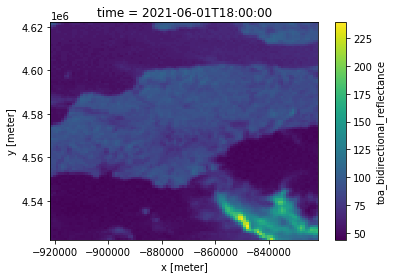

In [54]:
dataset['data'].sel(time="2021-06-01 18:00").plot()

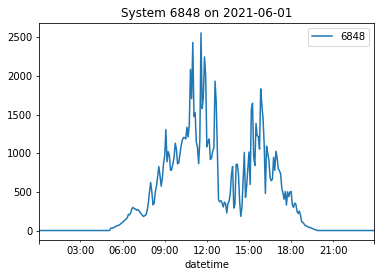

In [24]:
# A much clouder day, August 1st 2021

devon_pv_df = pv_power['6848'].to_dataframe()

# Goal is to get different images to match up with PV yield, maybe 4-8 over the course of a day

devon_pv_df = devon_pv_df[devon_pv_df.index < '2021-08-02']
devon_pv_df = devon_pv_df[devon_pv_df.index > '2021-08-01']

devon_pv_df.plot()
plt.title('System 6848 on 2021-06-01');

In [39]:
# Data ranges? Solar PV is every 5 minutes, from 2018-01-01 to 2021-10-27

devon_pv_df = pv_power['6848'].to_dataframe()

devon_pv_df.min(axis=1)


datetime
2018-01-01 06:05:00    0.0
2018-01-01 06:10:00    0.0
2018-01-01 06:15:00    0.0
2018-01-01 06:20:00    0.0
2018-01-01 06:25:00    0.0
                      ... 
2021-10-27 23:35:00    0.0
2021-10-27 23:40:00    0.0
2021-10-27 23:45:00    0.0
2021-10-27 23:50:00    0.0
2021-10-27 23:55:00    0.0
Length: 387254, dtype: float64

In [60]:
# Energy goes from 6AM to 7:30PM

In [53]:
# Satellite images, every 5 minutes, but different timings - including midnight

times = dataset['time'].to_dataframe()

In [54]:
times # also in 

,time
time,
2020-01-01 00:05:00,2020-01-01 00:05:00
2020-01-01 00:10:00,2020-01-01 00:10:00
2020-01-01 00:15:00,2020-01-01 00:15:00
2020-01-01 00:20:00,2020-01-01 00:20:00
2020-01-01 00:25:00,2020-01-01 00:25:00
...,...
2021-11-07 15:30:00,2021-11-07 15:30:00
2021-11-07 15:35:00,2021-11-07 15:35:00
2021-11-07 15:40:00,2021-11-07 15:40:00
